<a href="https://colab.research.google.com/github/jdmartinezrs/K-NN_MODEL_KM_VEHICLE_PREDICTION/blob/main/KNeighborsRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Cargar datos desde Google Drive
sheet_id = '1r4szNXN8abPstdpZEtuePc89H6AJPgjq'
sheet_url = f'https://drive.google.com/uc?id={sheet_id}&export=download'
df = pd.read_csv(sheet_url)

Mounted at /content/drive


In [2]:
# Renombrar columnas
df.rename(columns={
    'Ult Km/Hr': 'Ult_Km',
    'Km/ Hr Plan': 'Km_Plan',
    'Km/Hr Cambio': 'Km_Cambio',
    'Dias Pend': 'Dias_Pend',
    'Tipo de Vehiculo': 'Tipo_Vehiculo',
    'Km/Hr Pend': 'Km_Pend'
}, inplace=True)

# Variables
numeric_features = ['Ult_Km', 'Km_Plan', 'Km_Cambio', 'Dias_Pend', 'Progreso']
categorical_features = ['Tipo_Vehiculo']

# Preprocesamiento
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Modelo con pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=3))
])

# Variables para entrenamiento
X = df[numeric_features + categorical_features]
y = df['Km_Pend']

# Entrenamiento
model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Ult_Km', 'Km_Plan',
                                                   'Km_Cambio', 'Dias_Pend',
                                                   'Progreso']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Tipo_Vehiculo'])])),
                ('regressor', KNeighborsRegressor(n_neighbors=3))])


--- SISTEMA DE PREDICCIÓN DE KM PENDIENTES PARA REALIZAR EL PRÓXIMO MANTENIMIENTO ---

Elige el tipo de vehículo:
1. IRRIGADOR
2.   VOLQ SENCILLA
3. DOBLETROQUE
4. GRUA
5. CARRO TANQUE
6. TRACTOCAMION
Tu opción (1-6): 1
Ingrese los kilómetros recorridos (Ult_Km): 6587

📊 Predicción de KNN: 6116.67

¿Deseas hacer otra predicción? (s/n): s

Elige el tipo de vehículo:
1. IRRIGADOR
2.   VOLQ SENCILLA
3. DOBLETROQUE
4. GRUA
5. CARRO TANQUE
6. TRACTOCAMION
Tu opción (1-6): 2
Ingrese los kilómetros recorridos (Ult_Km): 6587

📊 Predicción de KNN: 6227.00

¿Deseas hacer otra predicción? (s/n): n

--- RESUMEN DE PREDICCIONES ---
   Ult_Km    Tipo_Vehiculo          KNN
0  6587.0        IRRIGADOR  6116.666667
1  6587.0    VOLQ SENCILLA  6227.000000


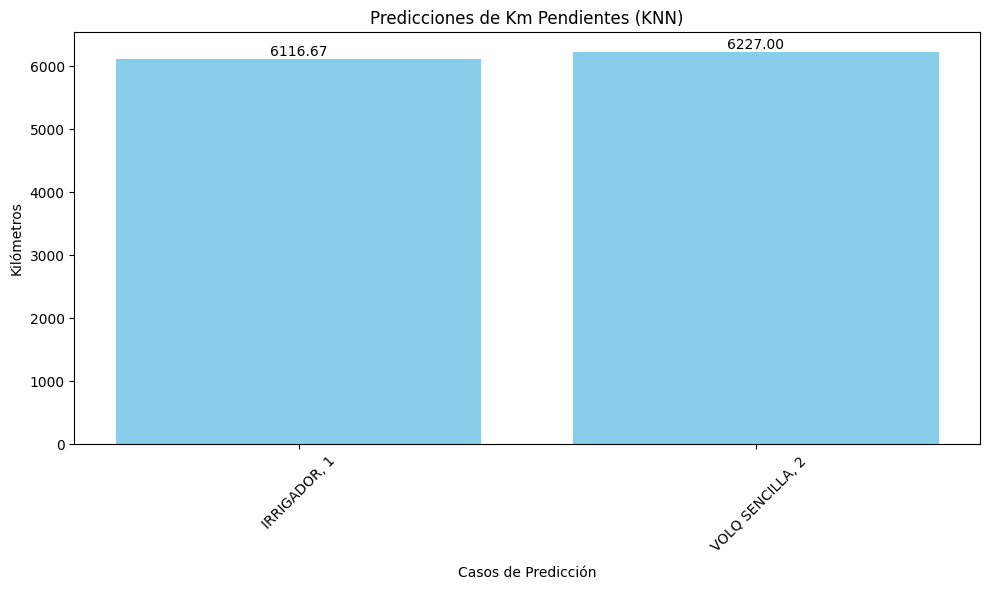

In [4]:
# Resultados
resultados = []

print("\n--- SISTEMA DE PREDICCIÓN DE KM PENDIENTES PARA REALIZAR EL PRÓXIMO MANTENIMIENTO ---")

while True:
    tipos_vehiculo = df['Tipo_Vehiculo'].unique().tolist()
    print("\nElige el tipo de vehículo:")
    for i, tipo in enumerate(tipos_vehiculo, start=1):
        print(f"{i}. {tipo}")
    while True:
        opcion = input(f"Tu opción (1-{len(tipos_vehiculo)}): ")
        if opcion.isdigit() and 1 <= int(opcion) <= len(tipos_vehiculo):
            tipo_vehiculo = tipos_vehiculo[int(opcion) - 1]
            break
        else:
            print("Opción inválida.")

    while True:
        try:
            km_recorridos = float(input("Ingrese los kilómetros recorridos (Ult_Km): "))
            break
        except ValueError:
            print("Ingresa un número válido.")

    input_data = pd.DataFrame([{
        'Ult_Km': km_recorridos,
        'Km_Plan': df['Km_Plan'].mean(),
        'Km_Cambio': df['Km_Cambio'].mean(),
        'Dias_Pend': df['Dias_Pend'].mean(),
        'Progreso': df['Progreso'].mean(),
        'Tipo_Vehiculo': tipo_vehiculo
    }])

    # Predicción
    pred = model.predict(input_data)[0]
    print(f"\n Predicción de KNN: {pred:.2f}")

    resultados.append({
        'Ult_Km': km_recorridos,
        'Tipo_Vehiculo': tipo_vehiculo,
        'KNN': pred
    })

    continuar = input("\n¿Deseas hacer otra predicción? (s/n): ").strip().lower()
    if continuar != 's':
        break

# Mostrar resultados
df_resultados = pd.DataFrame(resultados)

print("\n--- RESUMEN DE PREDICCIONES ---")
print(df_resultados)

# Gráfica
plt.figure(figsize=(10, 6))
for i, row in df_resultados.iterrows():
    etiqueta = f"{row['Tipo_Vehiculo']}, {i+1}"
    valor = row['KNN']
    plt.bar(etiqueta, valor, color='skyblue')
    plt.text(etiqueta, valor + 0.5, f"{valor:.2f}", ha='center', va='bottom', fontsize=10)
plt.title('Predicciones de Km Pendientes (KNN)')
plt.ylabel('Kilómetros')
plt.xlabel('Casos de Predicción')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()